# Loan default prediction using Logistic Regression and XGBoost

## Goal:
The goal of the project is to predict if a coustomer wating to take a loan is going to default it by not paying back the loan 
Thus telling a bank if it should grant a coustomer loan or not

### The Data:
The data is taken from kaggle 
It contains 10000 rows of data and contains 5 columns of which two of them are categorical and 2 are continuous

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
data_path = "./Default_Fin.csv"
org_data = pd.read_csv(data_path)

In [3]:
org_data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [4]:
org_data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
org_data.shape

(10000, 5)

Describing the type of data

In [6]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


Code to see some basic information about the data

In [7]:
org_data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


A bar chart to depict the number of coustomers who defaulted the loan and who did not

<AxesSubplot:xlabel='Defaulted?', ylabel='Count'>

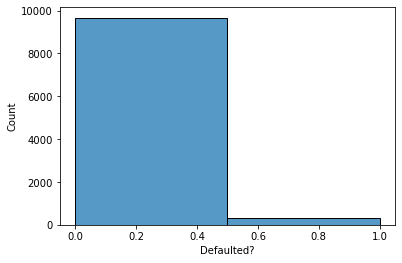

In [8]:
sns.histplot(data = org_data["Defaulted?"] , bins = 2)

From the above bar chart we can see that thre is high class imbalance in the data

A scatter plot to show the data points who defaulted the loan or not

<AxesSubplot:xlabel='Bank Balance', ylabel='Annual Salary'>

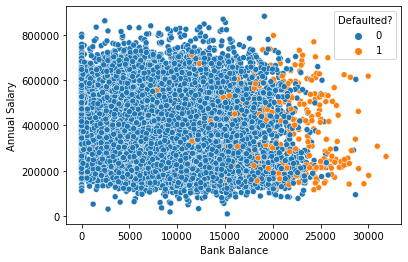

In [9]:
sns.scatterplot(x= org_data["Bank Balance"],y=org_data["Annual Salary"] , hue = org_data["Defaulted?"])

In [10]:
mod_data = org_data

Searching for empty values if any

In [11]:
mod_data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

We see that there are no empty or null values but there are zeros which were enterd by default so I replaced them with the median values

In [12]:
mod_data["Bank Balance"] = mod_data["Bank Balance"].replace(0,
                                                 mod_data["Bank Balance"].median())

The first column Index is dropped as it is not necessary

In [13]:
mod_data = mod_data.drop(["Index"],axis = 1)
mod_data

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [14]:
zeros = (mod_data["Bank Balance"] == 0).sum()
zeros

0

I seperated the data into X and Y depending on wheter the feature is independent or dependent

In [15]:
X = mod_data.iloc[:,0:3]
Y = mod_data["Defaulted?"]
X.shape , Y.shape

((10000, 3), (10000,))

Since the data has the problem of class imbalance which means the occerence of people defaulting the loan is very rare it gives 
a big problem to the classifier so we use over sampling approach to rectify this problem in which we sample the data points from
the rare class

In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9667, 1: 333})
Resample dataset shape Counter({0: 9667, 1: 9667})


In [17]:
x_ros

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
19329,0,19534.80,210564.00
19330,1,20385.96,328498.68
19331,1,18946.20,734641.56
19332,1,19325.76,427076.76


<AxesSubplot:xlabel='Defaulted?', ylabel='Count'>

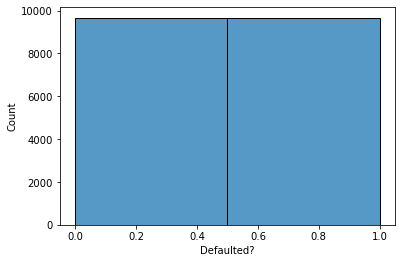

In [18]:
sns.histplot(data = y_ros , bins = 2)

After using over sampling the class imbalance problem is solved

<AxesSubplot:xlabel='Bank Balance', ylabel='Annual Salary'>

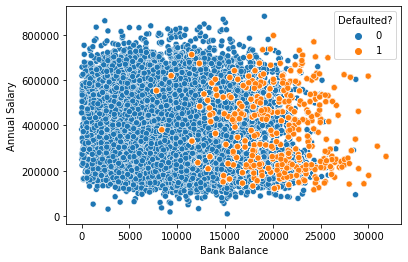

In [19]:
sns.scatterplot(x= x_ros["Bank Balance"],y=x_ros["Annual Salary"] , hue = y_ros)

Splitting the data into training and tesing sets using scikit learns train_test_split function

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ros , y_ros , 
                                                 test_size = 0.25)

In [21]:
print((x_train.shape , y_train.shape) ,(x_test.shape , y_test.shape))

((14500, 3), (14500,)) ((4834, 3), (4834,))


### Using Logistic Regression
I used logistic regression first

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none' , random_state = 0)
clf.fit(x_train.values , y_train.values)

LogisticRegression(penalty='none', random_state=0)

Importing some metrics libraries

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
y_pred = clf.predict(x_test.values)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

We now generate the confusion matrix for the predictions on the test set

<AxesSubplot:>

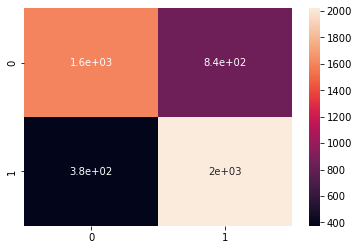

In [25]:
conf_mat = confusion_matrix(y_test , y_pred)
sns.heatmap(conf_mat, annot=True)

The classification report incluing various metrics is given below

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.66      0.72      2440
           1       0.71      0.84      0.77      2394

    accuracy                           0.75      4834
   macro avg       0.76      0.75      0.75      4834
weighted avg       0.76      0.75      0.75      4834



## Using Support Vector Machines
I used support vector machines since I am not satisfied with the metrics from logistic regression

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 

In [29]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state = 1))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=1))])

In [30]:
y_predict_1=clf.predict(x_test)

The confusion matrix for the predictions from SVM is made

<AxesSubplot:>

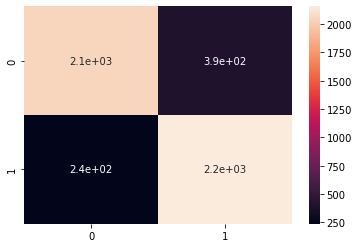

In [31]:
conf_mat = confusion_matrix(y_test , y_predict_1)
sns.heatmap(conf_mat, annot=True)

In [32]:
print(classification_report(y_test, y_predict_1))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2440
           1       0.85      0.90      0.87      2394

    accuracy                           0.87      4834
   macro avg       0.87      0.87      0.87      4834
weighted avg       0.87      0.87      0.87      4834



The classification report from the SVM looks good but we can do better so I used XGBoost to further improve the metrics

## Using XGBoost

In [33]:
from xgboost import XGBClassifier
clf_3 = XGBClassifier()
clf_3.fit(x_train , y_train)

[15:24:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
xgb_predicts = clf_3.predict(x_test)

In [35]:
print(classification_report(y_test , xgb_predicts))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2440
           1       0.96      1.00      0.98      2394

    accuracy                           0.98      4834
   macro avg       0.98      0.98      0.98      4834
weighted avg       0.98      0.98      0.98      4834



The metrics looks perfect so I am satisfied with this model I was traking metrics like precision , recall , f1-score 
as the case where the coustomer defaults the loan is not likely to occur more

This model is saved to later use it for buliding application

In [ ]:
import pickle
with open('xgb_model', 'wb') as files:
    pickle.dump(clf_3, files)